In [15]:
# Get preprocessing methods from make_network.ipynb to keep consistent.
RANDOM_STATE = 5664
import os
import pandas as pd
def load_and_clean_data(filepath):
    """
    Load Reddit data and remove duplicate user-subreddit combinations.
    
    Args:
        filepath (str): Path to the CSV data file
        
    Returns:
        pandas.DataFrame: Cleaned dataframe with unique user-subreddit combinations
    """
    try:
        # Check if file exists
        if not os.path.exists(filepath):
            raise FileNotFoundError(f"Data file not found: {filepath}")
            
        # Load the dataset
        print(f"Loading data from {filepath}...")
        df = pd.read_csv(filepath)
        print(f"Original data shape: {df.shape}")
        
        # Remove exact duplicates
        df_unique = df.drop_duplicates().copy()
        
        print(f"Data shape after removing exact duplicates: {df_unique.shape}")
        
        return df_unique
    
    except Exception as e:
        print(f"Error in load_and_clean_data: {str(e)}")
        raise
    
def analyze_post_dates(df):
    # Convert post_created_time to datetime
    df['post_created_time'] = pd.to_datetime(df['post_created_time'])
    
    # Get the earliest and latest dates
    min_date = df['post_created_time'].min()
    max_date = df['post_created_time'].max()
    
    return min_date, max_date

def filter_by_date(df, start_date=None, end_date=None):
    """
    Filter dataframe to include only posts within a specific date range.
    
    Args:
        df (pandas.DataFrame): DataFrame with 'post_created_time' column
        start_date (str, datetime, optional): Keep posts on or after this date
        end_date (str, datetime, optional): Keep posts on or before this date
        
    Returns:
        pandas.DataFrame: Filtered dataframe
    """
    # Make sure post_created_time is datetime
    if not pd.api.types.is_datetime64_dtype(df['post_created_time']):
        df['post_created_time'] = pd.to_datetime(df['post_created_time'])
    
    original_count = len(df)
    
    # Apply date filters
    if start_date is not None:
        if isinstance(start_date, str):
            start_date = pd.to_datetime(start_date)
        df = df[df['post_created_time'] >= start_date]
    
    if end_date is not None:
        if isinstance(end_date, str):
            end_date = pd.to_datetime(end_date)
        df = df[df['post_created_time'] <= end_date]
    
    # Report on filtering
    print(f"Date filtering:")
    if start_date is not None:
        print(f"  Start date: {start_date}")
    if end_date is not None:
        print(f"  End date: {end_date}")
    print(f"  Original records: {original_count}")
    print(f"  Filtered records: {len(df)} ({len(df)/original_count*100:.1f}% retained)")
    
    return df

## Load data

In [16]:
from datetime import timedelta

df_clean = load_and_clean_data("reddit_opinion_ru_ua.csv")
min_date, max_date = analyze_post_dates(df_clean)
cutoff_date = max_date - timedelta(days=5) # Get enough to be meaningful, but not too many to be impractical to run

df_recent = filter_by_date(df_clean, start_date=cutoff_date)

Loading data from reddit_opinion_ru_ua.csv...
Original data shape: (5168018, 24)
Data shape after removing exact duplicates: (5168018, 24)
Date filtering:
  Start date: 2025-04-24 11:00:47
  Original records: 5168018
  Filtered records: 50011 (1.0% retained)


In [17]:
todrop = ["comment_id", "created_time","post_id","user_is_verified","user_account_created_time", "user_awardee_karma", "user_awarder_karma", "user_comment_karma", "user_link_karma", "post_created_time"]
df_recent.drop(todrop, axis=1).copy()
df_recent

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,mpn18ju,1,I'd have to agree that it's hard to shop for m...,AskARussian,2025-04-29 11:08:21,1kaa04k,rsaachit,0,1,0,...,1462.0,810.0,2272.0,8,hello!! I’m currently trying to come up with g...,Gifts for Russian man - from an American,0.78,8,0,2025-04-28 23:37:58
1,mpn188l,1,"They don't, so you don't have to worry about t...",europe,2025-04-29 11:08:16,1kajrb4,potatolulz,0,1,0,...,11179.0,594349.0,605528.0,590,NaN,Zelensky dismisses Putin’s declaration of a 72...,0.98,590,0,2025-04-29 09:27:03
2,mpn16la,1,Trump is just buying time. He won't do shit t...,UkraineWarVideoReport,2025-04-29 11:07:55,1kajrn6,Many-Cartographer-45,0,1,0,...,1.0,2491.0,2492.0,134,NaN,The real Putin is now clear to Trump - and his...,0.95,134,0,2025-04-29 09:27:45
3,mpn14md,1,They are being randomly called up for military...,worldnews,2025-04-29 11:07:29,1kaipov,Corka,0,1,0,...,789.0,136268.0,137057.0,2185,NaN,"Russia has lost over 950,000 soldiers since Fe...",0.97,2185,0,2025-04-29 08:07:53
4,mpn141c,1,Most of your assumptions here are wrong.\n\nFi...,worldnews,2025-04-29 11:07:21,1kaipov,LeSygneNoir,0,1,0,...,32188.0,180480.0,212668.0,2185,NaN,"Russia has lost over 950,000 soldiers since Fe...",0.97,2185,0,2025-04-29 08:07:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53486,morpkzi,23,Krasnov,europe,2025-04-24 11:16:13,1k6pk64,davidd679,0,23,0,...,1.0,1342.0,1343.0,4204,NaN,Trump’s Plan to Sell Out Ukraine to Russia. Hi...,0.98,4204,0,2025-04-24 11:12:13
53525,morp8gl,1,Would we give up a section of the US to secure...,geopolitics,2025-04-24 11:13:37,1k6phqk,UnusualAir1,0,1,0,...,163647.0,183516.0,347163.0,265,It should be argued that Trump himself is prol...,Trump says Zelenskyy is prolonging war in Ukra...,0.89,265,0,2025-04-24 11:08:13
53528,morp7gg,7,good to see Poland and Ukraine coming together...,worldnews,2025-04-24 11:13:25,1k6ph7j,Appropriate_Age_8918,0,7,0,...,70.0,725.0,795.0,116,NaN,Poland and Ukraine jointly condemn vandalism o...,0.92,116,0,2025-04-24 11:07:22
53588,morofnx,2,Pinged EUROPE ([subscribe](https://reddit.com/...,neoliberal,2025-04-24 11:07:22,1k6pgt2,groupbot,0,2,0,...,3.0,137119.0,137122.0,99,Poland and Ukraine have issued a joint stateme...,Poland and Ukraine jointly condemn vandalism o...,0.98,99,0,2025-04-24 11:06:42


In [18]:
# Get basic information
print("Number of comments:", len(df_recent))
print("All subreddits:")
pd.DataFrame(df_recent.subreddit.explode().unique())

Number of comments: 50011
All subreddits:


,0
0,AskARussian
1,europe
2,UkraineWarVideoReport
3,worldnews
4,UkraineRussiaReport
5,conspiracy
6,ukraine
7,ANormalDayInRussia
8,UkrainianConflict
9,russiawarinukraine


## Set up for topic modeling and sentiment analysis for comments, posts, and post titles

In [19]:
# import nltk
# nltk.download("stopwords")
# nltk.download("punkt_tab")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem.porter import *

def preprocess_one_doc(text: str, lower: bool, punct: bool, stop: bool, stem: bool):
    puncts = set(string.punctuation)
    puncts.add("...") # punct does not contain ellipses
    puncts.add("…")
    puncts.add("===")
    puncts.add("—")
    puncts.add("–")
    puncts.add("“")
    puncts.add("”")
    puncts.add("’")
    puncts.add("‘")
    stops = set(stopwords.words("english"))
    # stops.add("")
    
    
    # Lowercase the words depending on sentiment or topic modeling
    if lower:
        step0 = text.lower()
    else:
        step0 = text
    step1 = word_tokenize(step0)
    
    
    if punct:
        step2 = "".join([ch for ch in " ".join(step1) if ch not in puncts]).split()
    else:
        step2 = step1
        
        
    
    if stop:
        # Remove stopwords
        step3 = [token for token in step2
                    if token not in stops # drop stopwords
                    # and len(token) > 2 # drop words of insignificant length
                    and (not token.startswith("http"))] # drop links
    else:
        step3 = step2
        
    if stem:
        stemmer = PorterStemmer()
        step4 = [stemmer.stem(i) for i in step3]
    else:
        step4 = step3
        
    return step4

from gensim import corpora, models

def make_dictionary(alltexts):
    d = corpora.Dictionary(alltexts)
    d.filter_extremes(no_below=5, no_above=0.3) # Keep words that are in more than 5 documents, but not in more than a third of all documents
    d.compactify()
    return d

from langdetect import detect, DetectorFactory
DetectorFactory.seed = RANDOM_STATE

def filter_english(text):
    try:
        return detect(text) == "en"
    except:
        return False

def clean_column(df, text_column_name):
    # Drop all missing values
    dfc = df.copy()
    dfc.dropna(subset=[text_column_name], inplace=True)
    
    # Filter non-english text
    is_english = dfc[text_column_name].apply(filter_english)
    dfc = dfc[is_english]
    return dfc

def make_all_components(df, text_column_name):
    dfc = clean_column(df, text_column_name)
    
    # Create with standard preprocessing
    preprocessed = dfc[text_column_name].apply(lambda x: preprocess_one_doc(x, lower=True, stop=True, punct=True, stem=True)) # Preprocess all docs
    dictionary = make_dictionary(preprocessed.tolist()) # Use list of lists of strings
    corpus = [dictionary.doc2bow(text) for text in preprocessed.tolist()] # bag of words representation of documents
    return preprocessed, dictionary, corpus

In [20]:
# Create with standard preprocessing
print("Processing comments")
preprocessed_comments, dictionary_comments, corpus_comments = make_all_components(df_recent, "self_text")
print("Processing post content")
preprocessed_post_content, dictionary_post_content, corpus_post_content = make_all_components(df_recent, "post_self_text")
print("Processing titles")
preprocessed_title, dictionary_title, corpus_title = make_all_components(df_recent, "post_title")

Processing comments
Processing post content
Processing titles


## Evaluate to find best number of topics

In [21]:
# Taken from https://medium.com/analytics-vidhya/topic-modeling-using-gensim-lda-in-python-48eaa2344920

from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

def eval_model(model, text, corp, dic):
    # Compute Perplexity
    perp = model.log_perplexity(corp)
    # a measure of how good the model is. lower the better.
    
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=model, texts=text, dictionary=dic, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    
    return perp, coherence

def plot_evals(perps, coherences, ks):
    
    fig = plt.figure("Perplexity and Coherence Analysis", figsize=(8, 8))
    axgrid = fig.add_gridspec(1, 2)
    
    ax1 = fig.add_subplot(axgrid[0, 0])
    ax1.plot(ks, perps)
    ax1.set_title("Number of topics vs Perplexity Score")
    ax1.set_xlabel("Number of Topics")
    ax1.set_ylabel("Perplexity Score")
    ax1.grid()
    
    ax2 = fig.add_subplot(axgrid[0, 1])
    ax2.plot(ks, coherences)
    ax2.set_title("Number of topics vs Coherence Score")
    ax2.set_xlabel("Number of Topics")
    ax2.set_ylabel("Coherence Score")
    ax2.grid()
    
    fig.tight_layout()
    plt.show()
    
    
def full_model_test_loop(text, corpus, dictionary, ks=[1,5,10,20]):
    # Run with a smaller, default set of ks first to reduce the range to search
    perps = []
    coherences = []
    for k in ks:
        ldamodel = models.ldamodel.LdaModel(corpus, num_topics=k, id2word=dictionary, passes=20, random_state=RANDOM_STATE)
        scores = eval_model(ldamodel, text.tolist(), corpus, dictionary)
        perps.append(scores[0])
        coherences.append(scores[1])
    plot_evals(perps, coherences, ks)

In [22]:
# # Run this to find the best k. Commented to save time. If the number of comments changes, this has to be rerun. Start with no k list.
# print("Comments eval:")
# full_model_test_loop(preprocessed_comments, corpus_comments, dictionary_comments, [3,4,5,6,7]) # 1st run best around 5
# print("Post Content eval:")
# full_model_test_loop(preprocessed_post_content, corpus_post_content, dictionary_post_content, [18,19,20,21,22]) # 1st run best around 20 (elbow)
# print("Post Title eval:")
# full_model_test_loop(preprocessed_title, corpus_title, dictionary_title, [18,19,20,21,22]) # 1st run best around 20

# 60-90 minutes.

## Topic Modeling 

In [23]:
k_comment = 5
k_post_content = 21
k_title = 20

In [24]:
ldamodel_comments = models.ldamodel.LdaModel(corpus_comments, num_topics=k_comment, id2word=dictionary_comments, passes=20, random_state=RANDOM_STATE)
ldamodel_post_content = models.ldamodel.LdaModel(corpus_post_content, num_topics=k_post_content, id2word=dictionary_post_content, passes=20, random_state=RANDOM_STATE)
ldamodel_title = models.ldamodel.LdaModel(corpus_title, num_topics=k_title, id2word=dictionary_title, passes=20, random_state=RANDOM_STATE)

# 8 min 30 sec

In [25]:
cp,cc = eval_model(ldamodel_comments, preprocessed_comments, corpus_comments, dictionary_comments)
pcp, pcc = eval_model(ldamodel_post_content, preprocessed_post_content, corpus_post_content, dictionary_post_content)
tp, tc = eval_model(ldamodel_title, preprocessed_title, corpus_title, dictionary_title)

model_names = ["comments", "post_content", "title"]
ks = [k_comment, k_post_content, k_title]
ps = [cp, pcp, tp]
cs = [cc, pcc, tc]
labels = ["Model","K-value","Perplexity","Coherence"]
table = pd.DataFrame({
    labels[0]: model_names,
    labels[1]: ks,
    labels[2]: ps,
    labels[3]: cs,
})
print("Perplexity and Coherence for each model at the best K value")
table

Perplexity and Coherence for each model at the best K value


,Model,K-value,Perplexity,Coherence
0,comments,5,-7.582630,0.617682
1,post_content,21,-9.404658,0.476215
2,title,20,-12.437024,0.523333


In [26]:
print("Comment topics:")
ldamodel_comments.show_topics()

Comment topics:


[(0,
  '0.067*"trump" + 0.038*"putin" + 0.014*"ukrain" + 0.013*"zelenski" + 0.013*"deal" + 0.013*"peac" + 0.012*"say" + 0.011*"presid" + 0.010*"said" + 0.010*"want"'),
 (1,
  '0.010*"year" + 0.010*"like" + 0.009*"drone" + 0.008*"use" + 0.007*"time" + 0.007*"russian" + 0.006*"one" + 0.006*"also" + 0.005*"day" + 0.005*"bomb"'),
 (2,
  '0.038*"ukrain" + 0.038*"russia" + 0.019*"war" + 0.014*"us" + 0.014*"russian" + 0.011*"gt" + 0.011*"would" + 0.009*"europ" + 0.008*"ukrainian" + 0.007*"crimea"'),
 (3,
  '0.034*"nt" + 0.020*"like" + 0.014*"get" + 0.014*"would" + 0.013*"go" + 0.012*"know" + 0.011*"one" + 0.011*"think" + 0.010*"good" + 0.009*"russia"'),
 (4,
  '0.017*"peopl" + 0.015*"russian" + 0.012*"nt" + 0.009*"like" + 0.009*"american" + 0.009*"countri" + 0.007*"one" + 0.007*"think" + 0.006*"us" + 0.006*"even"')]

In [27]:
print("Post content topics:")
ldamodel_post_content.show_topics()

Post content topics:


[(3,
  '0.063*"soldier" + 0.031*"wound" + 0.029*"gt" + 0.027*"hey" + 0.025*"one" + 0.021*"zelenskyy" + 0.019*"colombian" + 0.017*"kuzin" + 0.015*"drone" + 0.014*"kill"'),
 (4,
  '0.040*"would" + 0.032*"stock" + 0.029*"member" + 0.022*"congress" + 0.022*"lawmak" + 0.021*"us" + 0.020*"fund" + 0.020*"elect" + 0.020*"act" + 0.020*"offic"'),
 (8,
  '0.041*"fighter" + 0.027*"air" + 0.024*"forc" + 0.022*"product" + 0.021*"new" + 0.018*"aircraft" + 0.016*"close" + 0.016*"continu" + 0.016*"bomb" + 0.013*"reach"'),
 (9,
  '0.059*"name" + 0.027*"like" + 0.025*"peopl" + 0.023*"would" + 0.022*"mean" + 0.019*"nt" + 0.017*"also" + 0.014*"someth" + 0.012*"case" + 0.012*"chatgpt"'),
 (20,
  '0.019*"china" + 0.018*"weapon" + 0.017*"power" + 0.017*"use" + 0.013*"global" + 0.013*"would" + 0.013*"domin" + 0.013*"europ" + 0.012*"like" + 0.011*"someth"'),
 (19,
  '0.021*"iran" + 0.017*"need" + 0.017*"could" + 0.016*"would" + 0.016*"one" + 0.015*"2024" + 0.013*"nation" + 0.013*"attack" + 0.013*"us" + 0.012*"n

In [28]:
print("Title topics:")
ldamodel_title.show_topics()

Title topics:


[(14,
  '0.241*"peac" + 0.140*"nuclear" + 0.082*"propos" + 0.075*"meet" + 0.040*"vatican" + 0.039*"trump" + 0.034*"invas" + 0.033*"part" + 0.033*"foreign" + 0.028*"thread"'),
 (2,
  '0.198*"report" + 0.077*"messag" + 0.059*"nato" + 0.055*"12" + 0.051*"fighter" + 0.044*"name" + 0.040*"differ" + 0.035*"seen" + 0.033*"british" + 0.030*"aircraft"'),
 (0,
  '0.316*"kill" + 0.089*"24" + 0.055*"former" + 0.048*"member" + 0.048*"russiaukrain" + 0.046*"ft" + 0.035*"major" + 0.032*"noth" + 0.029*"sit" + 0.026*"separ"'),
 (11,
  '0.268*"us" + 0.111*"crimea" + 0.090*"kremlin" + 0.086*"urg" + 0.080*"russia" + 0.047*"demand" + 0.043*"talk" + 0.037*"senat" + 0.036*"hous" + 0.031*"white"'),
 (4,
  '0.291*"trump" + 0.191*"putin" + 0.185*"stop" + 0.076*"russia" + 0.075*"zelenski" + 0.072*"plan" + 0.055*"tell" + 0.024*"aggress" + 0.007*"way" + 0.007*"comment"'),
 (16,
  '0.126*"ukrainian" + 0.086*"2025" + 0.071*"april" + 0.055*"drone" + 0.047*"soldier" + 0.046*"direct" + 0.037*"use" + 0.033*"brigad" + 0.

## Sentiment Analysis 

In [46]:
import seaborn as sns

def plot_scores(scores):
    ax = sns.histplot(scores.melt(value_vars=["neg", "pos", "neu"]), x="value", hue="variable",
                      multiple="dodge", stat="percent", common_bins=True, common_norm=True, bins=20)
    ax.set_ylim(0, 50)
    return ax


def plot_sentiment_distribution(scores, title):
    plt.figure(figsize=(12, 6))
    plot_scores(scores)
    plt.title('Distribution of Sentiment Scores for ' + title)
    plt.xlabel('Score')
    plt.ylabel('Percent')
    plt.show()


def plot_compound_distribution(scores, title):
    plt.figure(figsize=(12, 6))
    ax = sns.histplot(scores, bins=20)
    plt.title('Distribution of Compound Sentiment Scores for ' + title)
    plt.xlabel('Compound Score')
    plt.ylabel('Percent')
    plt.show()

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
sid = SentimentIntensityAnalyzer()


def find_all_sentiments(document): # Split by sentence
    sentences = sent_tokenize(document)
    document_scores = {"pos":0, "neu":0, "neg":0, "compound":0}
    for sentence in sentences:
        sentence_scores = sid.polarity_scores(sentence)
        document_scores["compound"] += sentence_scores["compound"]
        document_scores["neg"] += sentence_scores["neg"]
        document_scores["neu"] += sentence_scores["neu"]
        document_scores["pos"] += sentence_scores["pos"]    
    num_sent = len(sentences)
    document_scores["compound"] /= num_sent
    document_scores["neg"] /= num_sent
    document_scores["neu"] /= num_sent
    document_scores["pos"] /= num_sent
    return document_scores


    
def find_all_topic_sentiments(corp, documents, model):
    dominant_topics = []
    document_scores = []
    corpdoc = zip(corp, documents) # Link each corpus "bag" representation with the full document
    for bag, document in corpdoc:
        topics = model.get_document_topics(bag)
        dominant_topic = max(topics, key=lambda x: x[1])[0]
        dominant_topics.append(dominant_topic)
        document_scores.append(find_all_sentiments(document))
        
    document_scores_df = pd.DataFrame(document_scores) # Each set of sentiments represents a document
    document_scores_df["text"] = documents.reset_index(drop=True) # Ensure alignment and drop nans
    document_scores_df["topic"] = dominant_topics # Also add the dominant topic
    
    topic_sentiments = document_scores_df.groupby("topic")[["pos","neu","neg","compound"]].mean()
        
    return topic_sentiments, document_scores_df.drop("topic", axis=1)

In [37]:
clean_comments = clean_column(df_recent, "self_text")["self_text"]
clean_post_content = clean_column(df_recent, "post_self_text")["post_self_text"]
clean_title = clean_column(df_recent, "post_title")["post_title"]

comment_topic_sentiments, comment_document_sentiments = find_all_topic_sentiments(corpus_comments, clean_comments, ldamodel_comments)
post_content_topic_sentiments, post_content_document_sentiments = find_all_topic_sentiments(corpus_post_content, clean_post_content, ldamodel_post_content)
title_topic_sentiments, title_document_sentiments = find_all_topic_sentiments(corpus_title, clean_title, ldamodel_title)
# 3 minutes

In [38]:
# Print the sentiments
print("Comment document sentiments")
comment_document_sentiments

Comment document sentiments


,pos,neu,neg,compound,text
0,0.214000,0.726000,0.060000,0.557400,I'd have to agree that it's hard to shop for m...
1,0.417000,0.583000,0.000000,0.753500,"They don't, so you don't have to worry about t..."
2,0.266000,0.660667,0.073333,0.249300,Trump is just buying time. He won't do shit t...
3,0.000000,0.962750,0.037250,-0.096625,They are being randomly called up for military...
4,0.052800,0.835800,0.111350,-0.139580,Most of your assumptions here are wrong.\n\nFi...
...,...,...,...,...,...
46297,0.333500,0.414500,0.252000,0.101150,"Yeah yeah, the daily russian nuclear threat. N..."
46298,0.097333,0.853667,0.049000,-0.010050,Would we give up a section of the US to secure...
46299,0.149000,0.718000,0.133000,0.077200,good to see Poland and Ukraine coming together...
46300,0.000000,1.000000,0.000000,0.000000,Pinged EUROPE ([subscribe](https://reddit.com/...


In [41]:
comment_document_sentiments["compound"]

0        0.557400
1        0.753500
2        0.249300
3       -0.096625
4       -0.139580
           ...   
46297    0.101150
46298   -0.010050
46299    0.077200
46300    0.000000
46301    0.555100
Name: compound, Length: 46302, dtype: float64

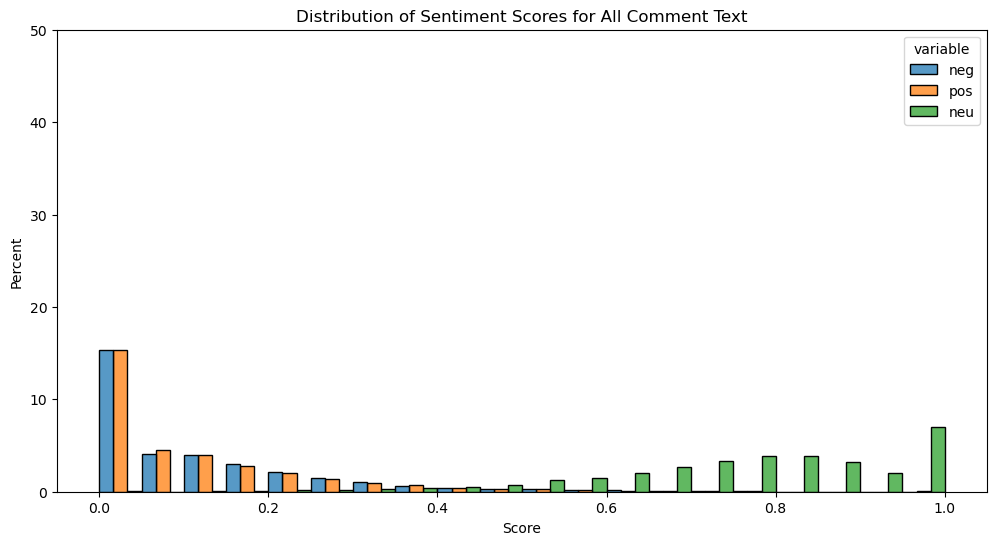

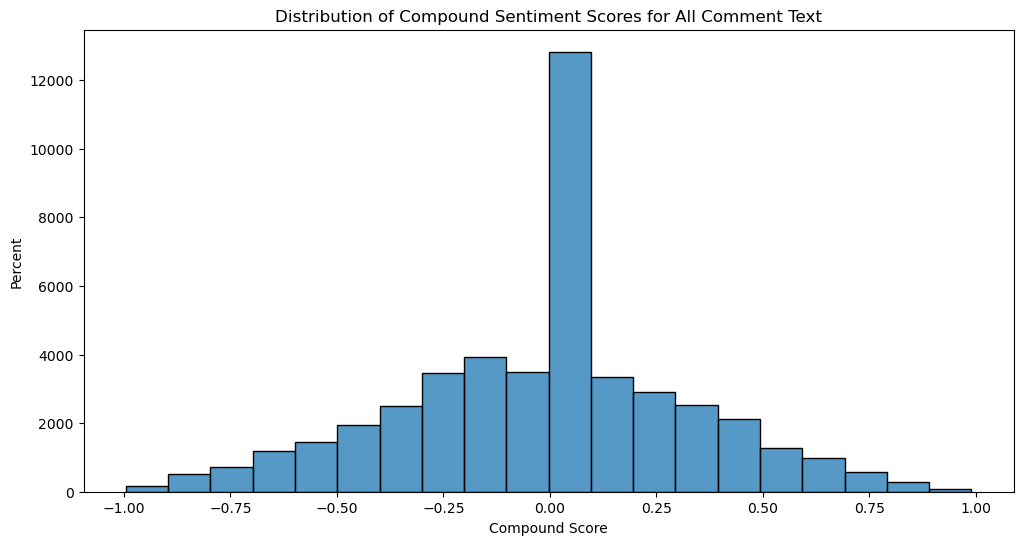

In [48]:
# Plot the sentiment distribution for all posts
plot_sentiment_distribution(comment_document_sentiments[['neg', 'pos', 'neu']], 'All Comment Text')
plot_compound_distribution(comment_document_sentiments["compound"], 'All Comment Text')

In [49]:
print("Comment topic sentiments")
comment_topic_sentiments

Comment topic sentiments


,pos,neu,neg,compound
topic,,,,
0,0.105910,0.766911,0.119988,-0.021652
1,0.100065,0.812858,0.082049,0.010837
2,0.086061,0.798063,0.112975,-0.070259
3,0.141172,0.726411,0.126475,-0.002906
4,0.111849,0.781397,0.103242,0.000709


In [50]:
print("Post Content document sentiments")
post_content_document_sentiments

Post Content document sentiments


,pos,neu,neg,compound,text
0,0.117000,0.830364,0.052636,0.167918,hello!! I’m currently trying to come up with g...
1,0.036667,0.811167,0.152167,-0.196900,Video was edited by the source.\n\nThis video ...
2,0.099231,0.722923,0.177923,-0.230338,"The massive blackout that hit Spain, Portugal,..."
3,0.099231,0.722923,0.177923,-0.230338,"The massive blackout that hit Spain, Portugal,..."
4,0.117000,0.830364,0.052636,0.167918,hello!! I’m currently trying to come up with g...
...,...,...,...,...,...
9226,0.123000,0.584000,0.292000,-0.735100,It should be argued that Trump himself is prol...
9227,0.123000,0.584000,0.292000,-0.735100,It should be argued that Trump himself is prol...
9228,0.123000,0.584000,0.292000,-0.735100,It should be argued that Trump himself is prol...
9229,0.062667,0.841714,0.095619,-0.134500,Poland and Ukraine have issued a joint stateme...


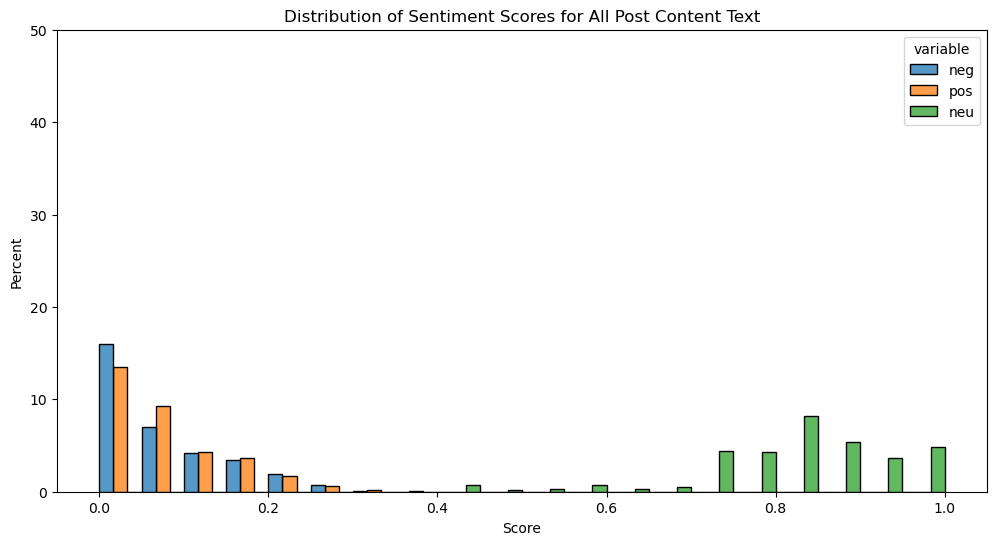

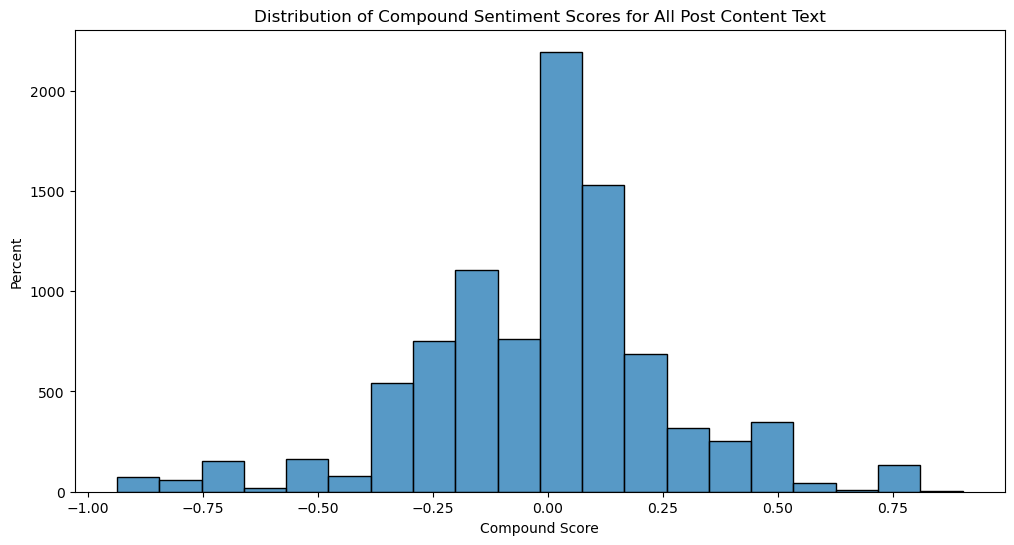

In [51]:
# Plot the sentiment distribution for all posts
plot_sentiment_distribution(post_content_document_sentiments[['neg', 'pos', 'neu']], 'All Post Content Text')
plot_compound_distribution(post_content_document_sentiments['compound'], 'All Post Content Text')

In [52]:
print("Post Content topic sentiments")
post_content_topic_sentiments

Post Content topic sentiments


,pos,neu,neg,compound
topic,,,,
0,0.122961,0.836463,0.040574,0.154394
1,0.060677,0.933869,0.005453,0.239282
2,0.112934,0.772034,0.115039,0.020793
3,0.076815,0.847676,0.063536,0.003361
4,0.033151,0.890239,0.076610,-0.122805
5,0.095686,0.810468,0.063577,0.066992
6,0.060532,0.855797,0.060925,-0.026454
7,0.134330,0.829012,0.035968,0.140716
8,0.076905,0.869115,0.053937,0.044253


In [53]:
print("Post Title document sentiments")
title_document_sentiments

Post Title document sentiments


,pos,neu,neg,compound,text
0,0.000,1.000,0.000,0.0000,Gifts for Russian man - from an American
1,0.138,0.862,0.000,0.3400,Zelensky dismisses Putin’s declaration of a 72...
2,0.459,0.541,0.000,0.8979,The real Putin is now clear to Trump - and his...
3,0.000,0.777,0.223,-0.3182,"Russia has lost over 950,000 soldiers since Fe..."
4,0.000,0.777,0.223,-0.3182,"Russia has lost over 950,000 soldiers since Fe..."
...,...,...,...,...,...
48970,0.169,0.688,0.143,0.1366,Trump’s Plan to Sell Out Ukraine to Russia. Hi...
48971,0.000,0.794,0.206,-0.5994,Trump says Zelenskyy is prolonging war in Ukra...
48972,0.000,0.606,0.394,-0.7579,Poland and Ukraine jointly condemn vandalism o...
48973,0.000,0.606,0.394,-0.7579,Poland and Ukraine jointly condemn vandalism o...


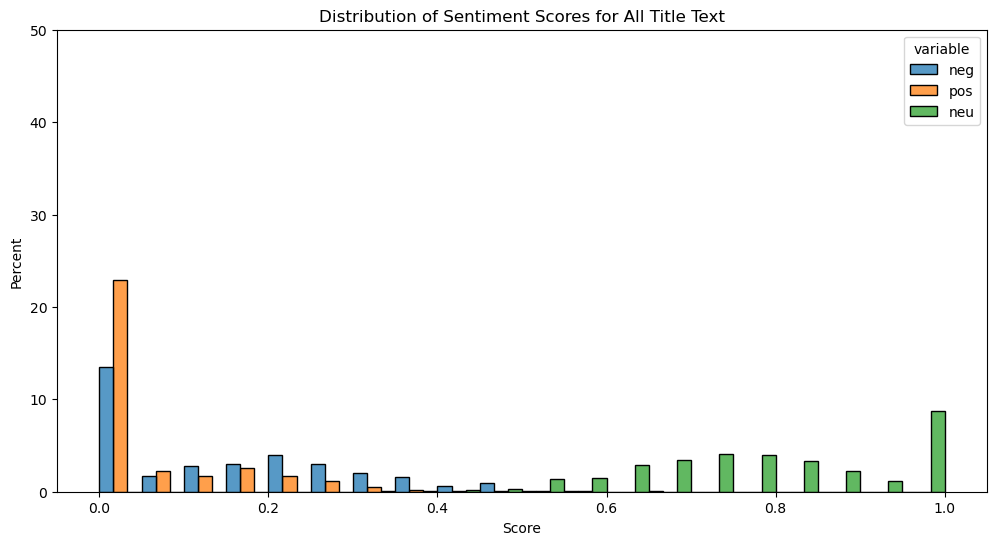

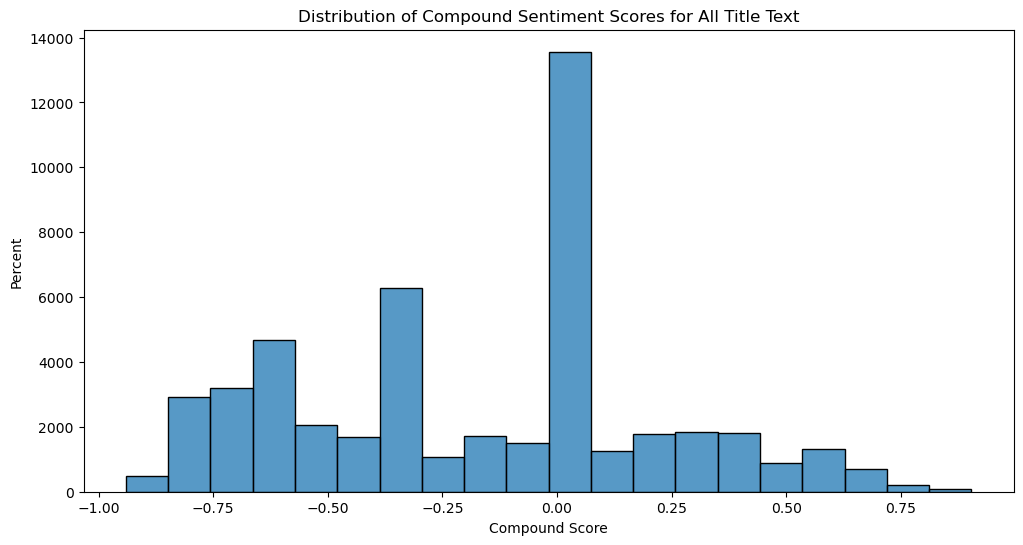

In [54]:
# Plot the sentiment distribution for all posts
plot_sentiment_distribution(title_document_sentiments[['neg', 'pos', 'neu']], 'All Title Text')
plot_compound_distribution(title_document_sentiments['compound'], 'All Title Text')

In [55]:
title_topic_sentiments

,pos,neu,neg,compound
topic,,,,
0,0.028669,0.801086,0.159767,-0.207685
1,0.079306,0.786272,0.134427,-0.134768
2,0.069393,0.845281,0.085326,-0.071708
3,0.083900,0.764892,0.148587,-0.183475
4,0.056896,0.829966,0.113146,-0.094077
5,0.016990,0.846382,0.136628,-0.204171
6,0.103907,0.765990,0.130092,-0.078927
7,0.088154,0.841845,0.070001,0.023199
8,0.079053,0.905096,0.015851,0.148935
